In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

columns = ['target'] + list(boston.feature_names)

df = pd.DataFrame(data=np.c_[boston.target, boston.data],
                  columns=columns)

df

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [36]:
X = df.drop(columns = ['target'])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [29]:
w0 = model.intercept_
w0

36.459488385090125

In [30]:
w1 = model.coef_
w1

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

y = 36.459488385090125 + CRIM * -1.08011358e-01 + ZN * 4.64204584e-02 + INDUS * 2.05586264e-02 + CHAS * 2.68673382e+00 + NOX * -1.77666112e+01 + RM * 3.80986521e+00 + AGE * 6.92224640e-04 + DIS * -1.47556685e+00 + RAD * 3.06049479e-01 + TAX * -1.23345939e-02 + PTRATIO * -9.52747232e-01 + B * 9.31168327e-03 + LSTAT * -5.24758378e-01

In [37]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


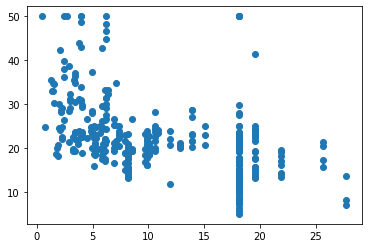

In [65]:
fig, ax = plt.subplots()
ax.scatter(X_train['INDUS'], y_train)
plt.show()

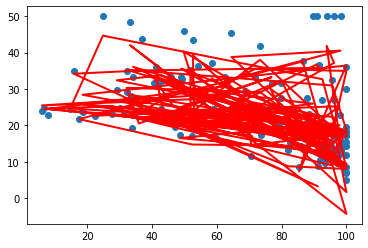

In [71]:
plt.scatter(X_test['AGE'], y_test)
plt.plot(X_test['AGE'], y_pred, color='red', linewidth=2);
plt.show()

In [74]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

#MAE, MSE имеют близкие значения к нулю, R2 же близка к 1. Значит обучение прошло успешно

Mean Absolute Error: 3.278374784188862
Mean Squared Error: 23.213656995333306
R2 score: 0.7717006263150866


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [80]:
t = (y_pred - y_test)**2
t.sum()/152

23.213656995333306